In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [2]:
df =pd.read_csv('covid.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'])

Text(0.5, 1.0, 'new_case of each continent')

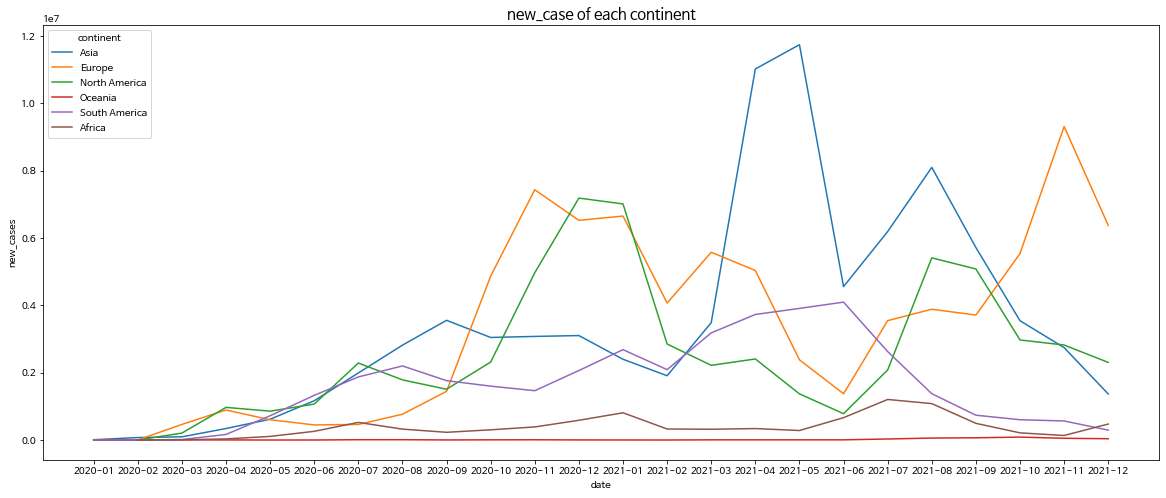

In [4]:
t = df.groupby(['continent',df.date.dt.strftime('%Y-%m')])['new_cases'].sum().reset_index().sort_values(['date','continent'])

plt.figure(figsize=(20,8))
sns.lineplot(data=t,x='date',y='new_cases',hue='continent')
plt.title('new_case of each continent',fontsize=15)

In [5]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148101,ZWE,Africa,Zimbabwe,2021-12-13,167140.0,0.0,4013.429,4738.0,0.0,4.000,11074.616,0.000,265.928,313.938,0.000,0.265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13289.0,1580406.0,104.717,0.881,12004.0,0.795,0.3343,3.0,tests performed,6956144.0,3967781.0,2988363.0,NaN,22307.0,25810.0,46.09,26.29,19.80,NaN,1710.0,12096.0,0.080,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
148102,ZWE,Africa,Zimbabwe,2021-12-14,172012.0,4872.0,4344.429,4740.0,2.0,3.857,11397.432,322.816,287.860,314.070,0.133,0.256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16793.0,1597199.0,105.830,1.113,12755.0,0.845,0.3406,2.9,tests performed,6980400.0,3981769.0,2998631.0,NaN,24256

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136931 entries, 0 to 136930
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    136931 non-null  object        
 1   continent                                   128210 non-null  object        
 2   location                                    136931 non-null  object        
 3   date                                        136931 non-null  datetime64[ns]
 4   total_cases                                 129343 non-null  float64       
 5   new_cases                                   129338 non-null  float64       
 6   new_cases_smoothed                          128298 non-null  float64       
 7   total_deaths                                118074 non-null  float64       
 8   new_deaths                                  118270 non-null  float64      

Text(0.5, 1.0, 'new_deaths of each continent')

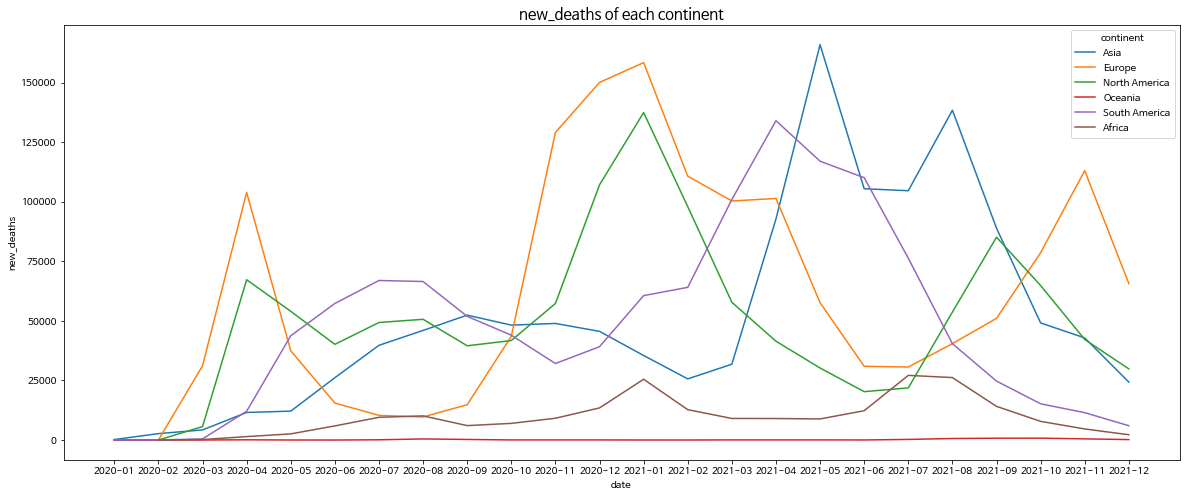

In [6]:
t = df.groupby(['continent',df.date.dt.strftime('%Y-%m')])['new_deaths'].sum().reset_index().sort_values(['date','continent'])

plt.figure(figsize=(20,8))
sns.lineplot(data=t,x='date',y='new_deaths',hue='continent')
plt.title('new_deaths of each continent',fontsize=15)

Text(0.5, 1.0, 'new_cases_per_million of each continent')

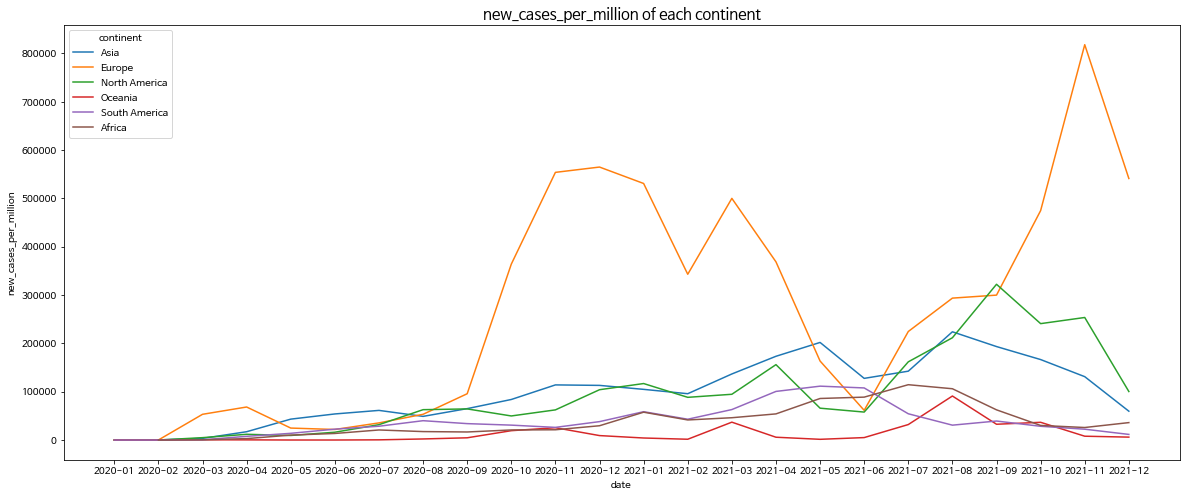

In [7]:
t = df.groupby(['continent',df.date.dt.strftime('%Y-%m')])['new_cases_per_million'].sum().reset_index().sort_values(['date','continent'])

plt.figure(figsize=(20,8))
sns.lineplot(data=t,x='date',y='new_cases_per_million',hue='continent')
plt.title('new_cases_per_million of each continent',fontsize=15)

In [8]:
no = df[df.date == pd.to_datetime('2021-11-30')].reset_index(drop=True)

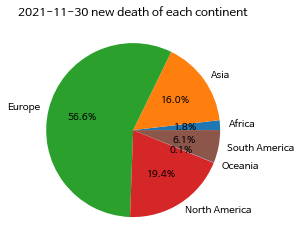

In [9]:
data =no.groupby(['continent']).sum()['new_deaths']
plt.pie(data.values,labels=data.index, autopct='%.1f%%')
plt.title('2021-11-30 new death of each continent')
plt.show()

한국과 일본의 확진자수 비교

Text(0.5, 1.0, 'South Korea-Japan New cases 2020 to 2021')

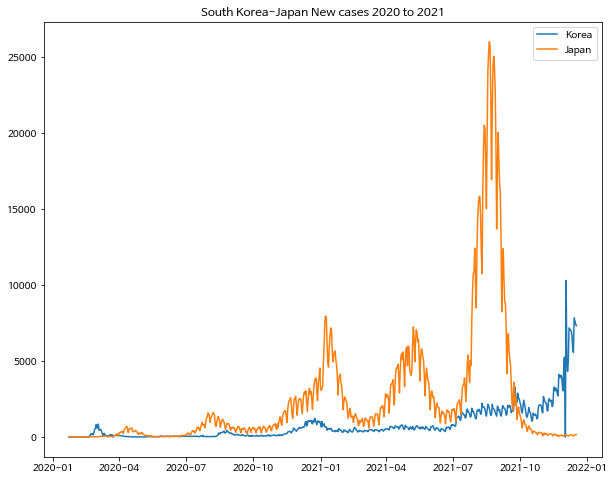

In [10]:
kr = df[df.location.str.contains('South Korea')].reset_index(drop=True)
jp = df[df.location.str.contains('Japan')].reset_index(drop=True)

plt.figure(figsize=(10,8))
plt.plot(kr.date,kr.new_cases,label='Korea')
plt.plot(jp.date,jp.new_cases,label='Japan')
plt.legend()
plt.title('South Korea-Japan New cases 2020 to 2021')

한국과 중국의 확진자수 비교

Text(0.5, 1.0, 'South Korea-China New cases 2020 to 2021')

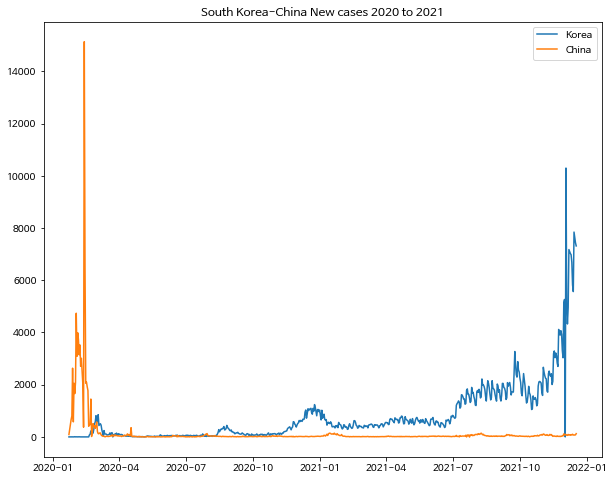

In [11]:
kr = df[df.location.str.contains('South Korea')].reset_index(drop=True)
ch = df[df.location.str.contains('China')].reset_index(drop=True)

plt.figure(figsize=(10,8))
plt.plot(kr.date,kr.new_cases,label='Korea')
plt.plot(ch.date,ch.new_cases,label='China')
plt.legend()
plt.title('South Korea-China New cases 2020 to 2021')

Text(0.5, 1.0, 'South Korea-China Total deaths 2020 to 2021')

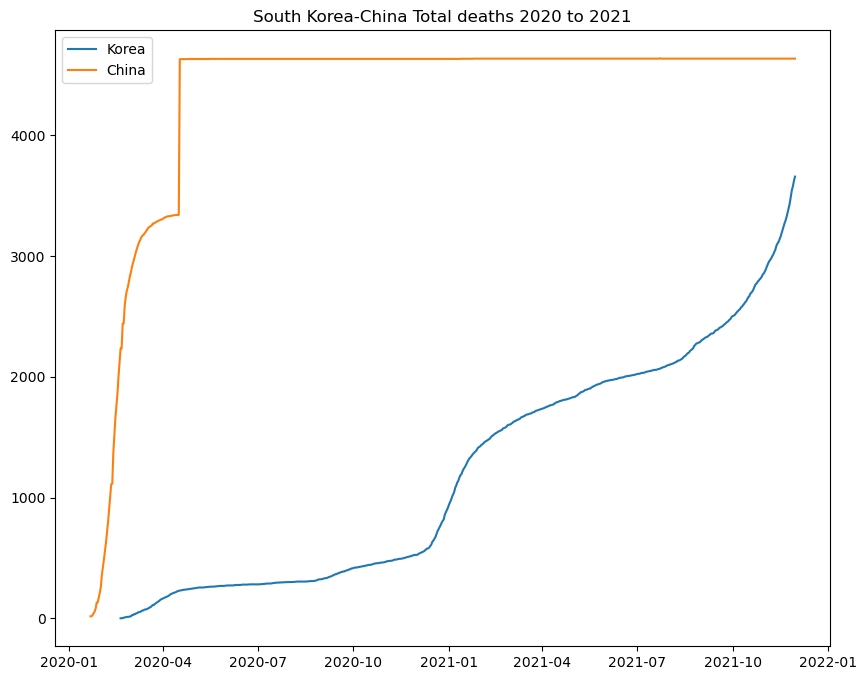

In [62]:
kr = df[df.location.str.contains('South Korea')].reset_index(drop=True)
ch = df[df.location.str.contains('China')].reset_index(drop=True)

plt.figure(figsize=(10,8))
plt.plot(kr.date,kr.total_deaths,label='Korea')
plt.plot(ch.date,ch.total_deaths,label='China')
plt.legend()
plt.title('South Korea-China Total deaths 2020 to 2021')

Text(0.5, 1.0, 'South Korea-Japan Total deaths 2020 to 2021')

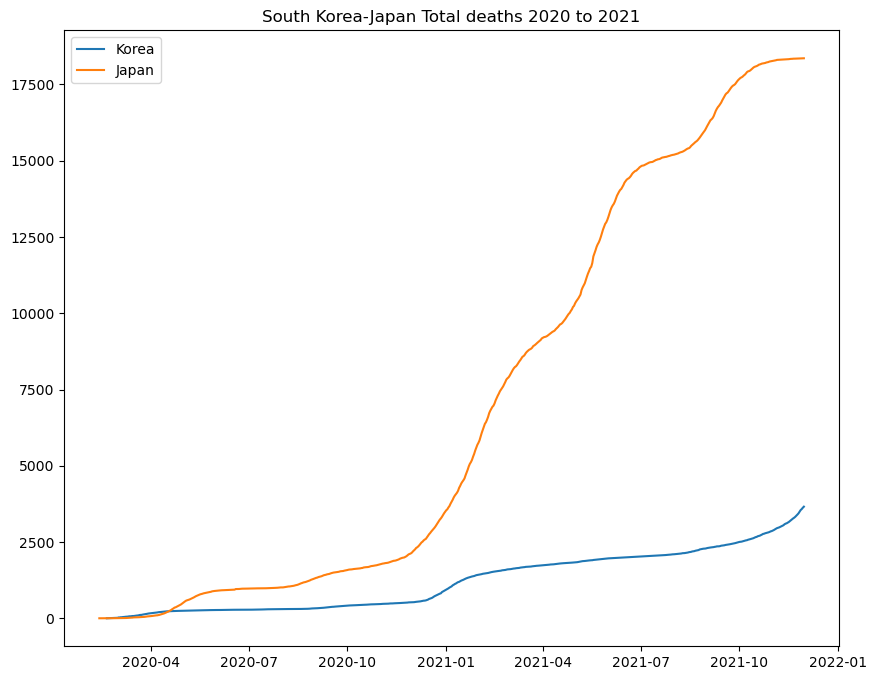

In [63]:
kr = df[df.location.str.contains('South Korea')].reset_index(drop=True)
jp = df[df.location.str.contains('Japan')].reset_index(drop=True)

plt.figure(figsize=(10,8))
plt.plot(kr.date,kr.total_deaths,label='Korea')
plt.plot(jp.date,jp.total_deaths,label='Japan')
plt.legend()
plt.title('South Korea-Japan Total deaths 2020 to 2021')

In [40]:
#상관관계 분석을 위한 데이터 구성
df_corr = df[['total_cases', 'total_deaths', 'new_cases', 'new_deaths' ,'icu_patients', 'hosp_patients', 'stringency_index', 'total_tests', 'total_vaccinations', 'new_tests', 'new_vaccinations','reproduction_rate']]

- 신규 확진자의 경우 신규 검사자, 신규 사망자와 상관관계가 있다고 볼 수 있다

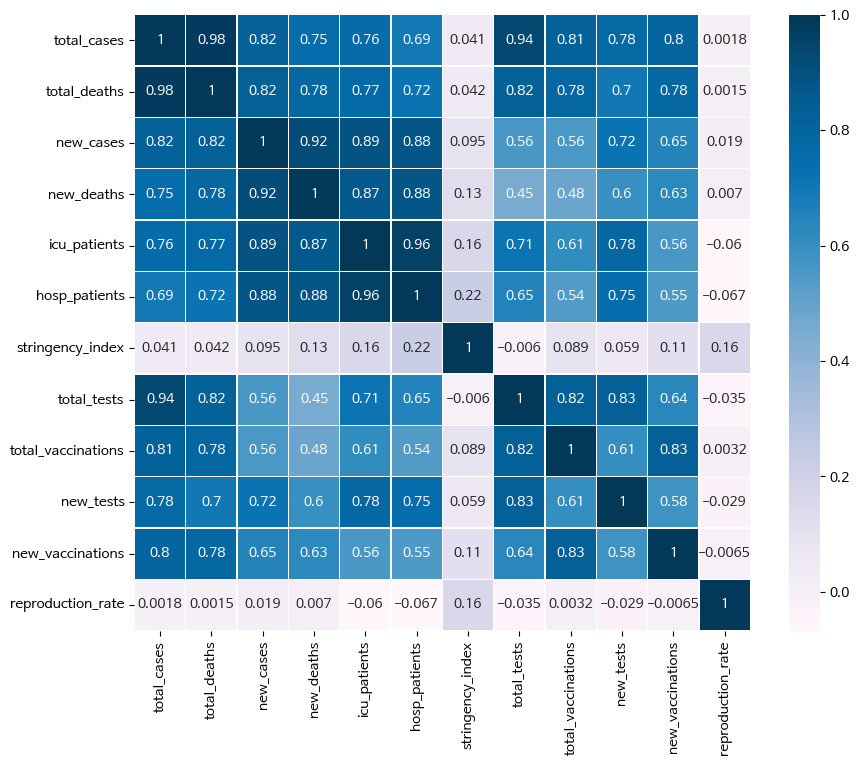

In [41]:
colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
# 상관관계 분석
sns.heatmap(df_corr.astype(float).corr(), linewidths = 0.1, vmax = 1.0, 
            square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10})


In [59]:
#한국 데이터 구성
df_1 = df[['date', 'iso_code',	'continent',	'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths' ,'icu_patients', 'hosp_patients', 'stringency_index', 'total_tests', 'total_vaccinations', 'new_tests', 'new_vaccinations','reproduction_rate']]

- 신규 백신 접종자의 경우 주말이 평일에 비해 적은것을 알 수 있다

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


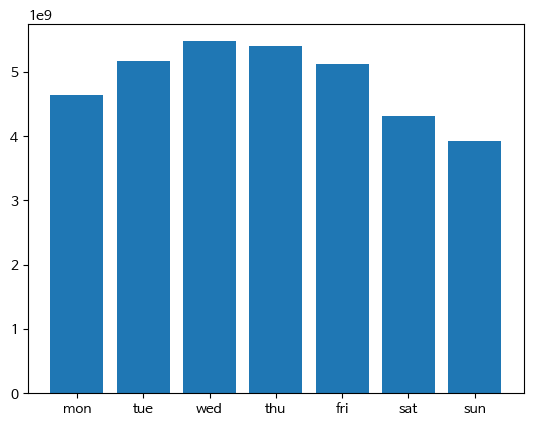

In [60]:
df_1['date'] = pd.to_datetime(df_1['date'])
df_1['dayofweek'] = df_1['date'].dt.dayofweek
#요일을 기준으로 데이터 합산
df_1_week_new_vaccinations = df_1.pivot_table(index = 'dayofweek', aggfunc = 'sum', values = 'new_vaccinations')
x = np.arange(7)
plt.bar(x, df_1_week_new_vaccinations['new_vaccinations'])
plt.xticks(x, ['mon','tue', 'wed', 'thu','fri', 'sat', 'sun'])
plt.show()

In [43]:
df_kor = df_1[df_1['iso_code'] == 'KOR']

- 사망자와 확진자의 동향이 어느정도 일치하는것을 알 수 있다

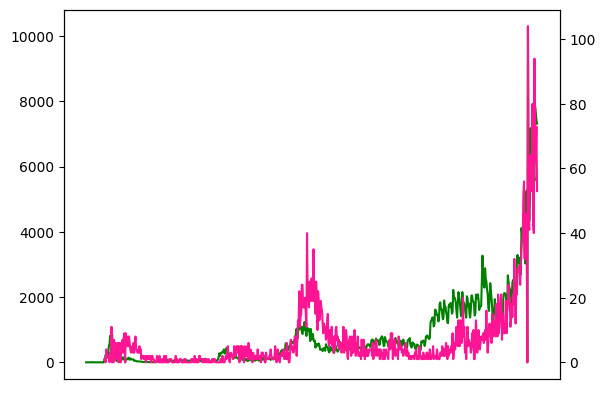

In [44]:
# 신규 확진자와 신규 사망자를 이용하여 2개의 y축을 이용하여 비교
plt.style.use('default')

fig, ax1 = plt.subplots()
ax1.plot(df_kor['new_cases'], color='green')
ax1.axes.xaxis.set_visible(False)
ax2 = ax1.twinx()
ax2.plot(df_kor['new_deaths'], color='deeppink')
ax2.axes.xaxis.set_visible(False)
plt.show()

- 원(신규 검사자)이 클수록 신규 확진자가 어느정도 많아지는것을 알 수 있다

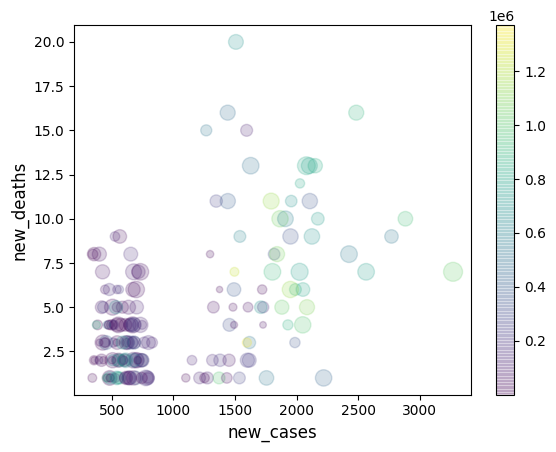

In [45]:
# 신규 사망자, 신규 확진자, 신규 검사자, 신규 접종자를 이용한 산점도 그래프 작성
plt.scatter(df_kor['new_cases'],
           df_kor['new_deaths'],
           alpha=0.2, 
           s=df_kor['new_tests']/400,
           c=df_kor['new_vaccinations'],
           cmap='viridis')

plt.xlabel('new_cases', fontsize=12)
plt.ylabel('new_deaths', fontsize=12)
plt.colorbar()
plt.show()

In [46]:
#일본과 비교를 위한 데이터셋 구성
df_2 = df[['date', 'iso_code',	'continent',	'location', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million' ,'stringency_index', 'total_tests_per_thousand', 'new_tests_per_thousand', 'total_vaccinations_per_hundred', 'total_vaccinations', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred','total_boosters_per_hundred']]

In [47]:
df2_kor = df_2[df_2['iso_code'] == 'KOR']
df2_jpn = df_2[df_2['iso_code'] == 'JPN']

In [48]:
df2_kor = df2_kor.set_index('date')
df2_jpn = df2_jpn.set_index('date')

- 동일 인구 기준으로 일본과 한국을 비교했을 경우 일본이 확진자가 많긴 하나 10월 이후로 볼수록 완만해지는것을 볼 수 있다

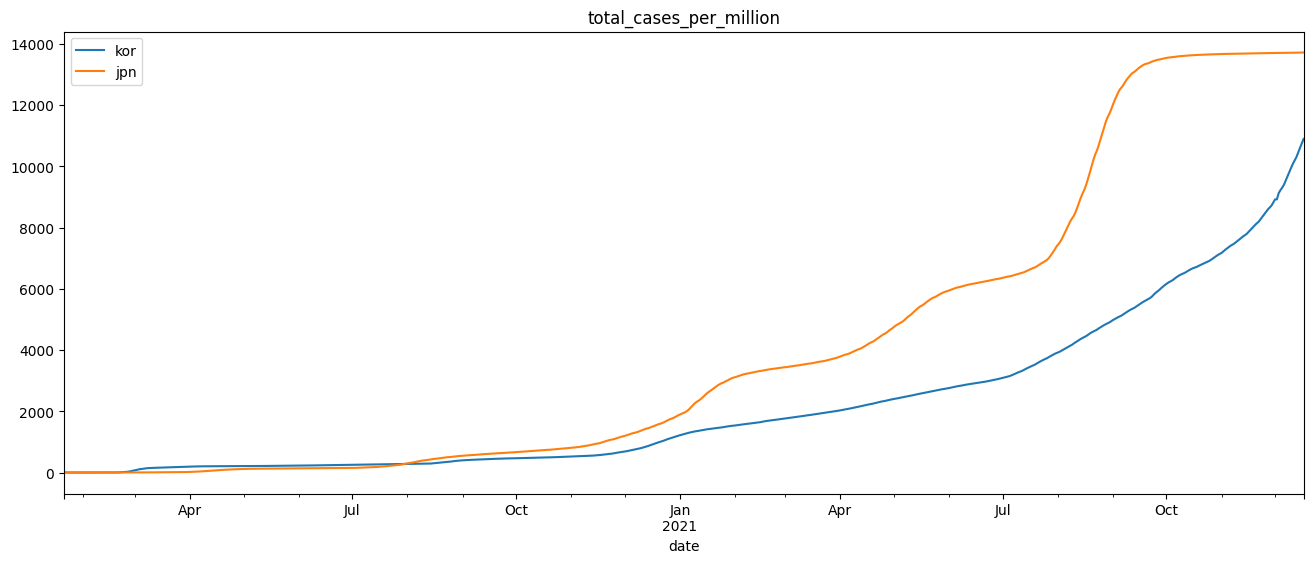

In [49]:
df2_kor['total_cases_per_million'].plot(title = 'total_cases_per_million', label = 'kor', figsize = (16, 6))
df2_jpn['total_cases_per_million'].plot(label = 'jpn', figsize = (16, 6))
plt.legend()

In [50]:
import requests

In [105]:
#data = requests.get('http://openapi.seoul.go.kr:8088/sample/xml/tvCorona19VaccinestatNew/1/5/')

In [101]:
#data

<Response [200]>

In [106]:
#x = pd.read_csv(data.text)

In [51]:
df_v =pd.read_csv('서울특별시 코로나19 백신 예방접종 현황.csv', encoding='cp949')

In [26]:
df_v['접종일'] = pd.to_datetime(df_v['접종일'])

In [27]:
df_v = df_v.sort_values(by=['접종일'])

In [134]:
#t= x.iloc[2:,3:].sort_values('S_VC_DT').reset_index(drop=True)

In [28]:
df_v

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 추가접종자 수,추가접종 누계,추가접종률(%)
242,2021-04-21,1019322,22501.0,291857,28.6,2358.0,13543,1.3,NaN,NaN,NaN
241,2021-04-22,1023538,27074.0,317386,31.0,2479.0,15901,1.6,NaN,NaN,NaN
240,2021-04-23,1027740,10195.0,345764,33.6,119.0,18376,1.8,NaN,NaN,NaN
239,2021-04-24,1023346,200.0,350427,34.2,0.0,18513,1.8,NaN,NaN,NaN
238,2021-04-25,1023346,23323.0,350631,34.2,3411.0,18513,1.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4,2021-12-15,9505868,8483.0,8034078,84.5,6705.0,7815332,82.2,139233.0,1663071.0,17.5
3,2021-12-15,9505868,11851.0,8034078,84.5,7820.0,7815332,82.2,170057.0,1663071.0,17.5
2,2021-12-16,9505868,13183.0,8049235,84.7,8643.0,7825944,82.3,160375.0,1828394.0,37.1
1,2021-12-17,9505868,16484.0,8068292,84.9,12303.0,7840748,82.5,213984.0,2048239.0,41.5


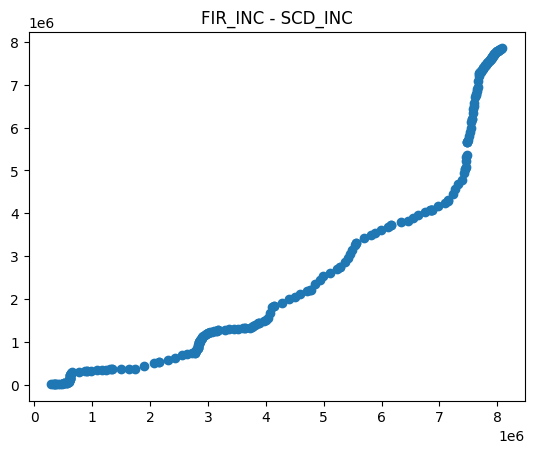

In [29]:
plt.scatter(df_v['1차접종 누계'],df_v['2차접종 누계'])
plt.title('FIR_INC - SCD_INC')
plt.show()

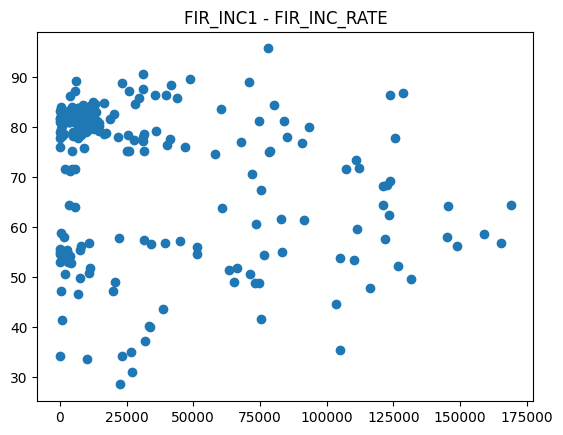

In [30]:
plt.scatter(df_v['당일 1차접종자 수'],df_v['1차접종률(%)'])
plt.title('FIR_INC1 - FIR_INC_RATE')
plt.show()

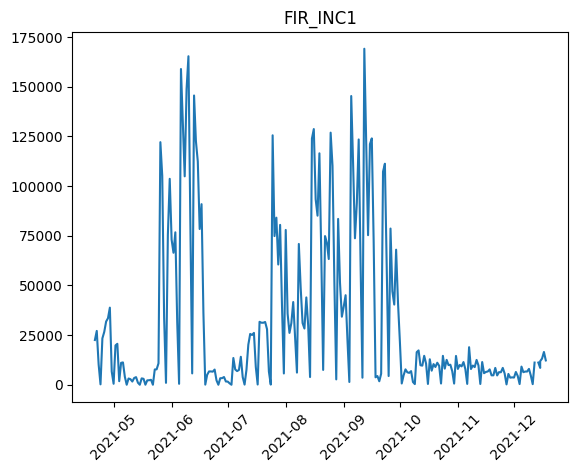

In [31]:
plt.plot(df_v['접종일'],df_v['당일 1차접종자 수'])
plt.xticks(rotation=45)
plt.title('FIR_INC1')
plt.show()

- 접종대상자 기준 1차 접종자수, 2차접종자수, 2차 접종률과 관계가 있다고 볼 수 있다

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


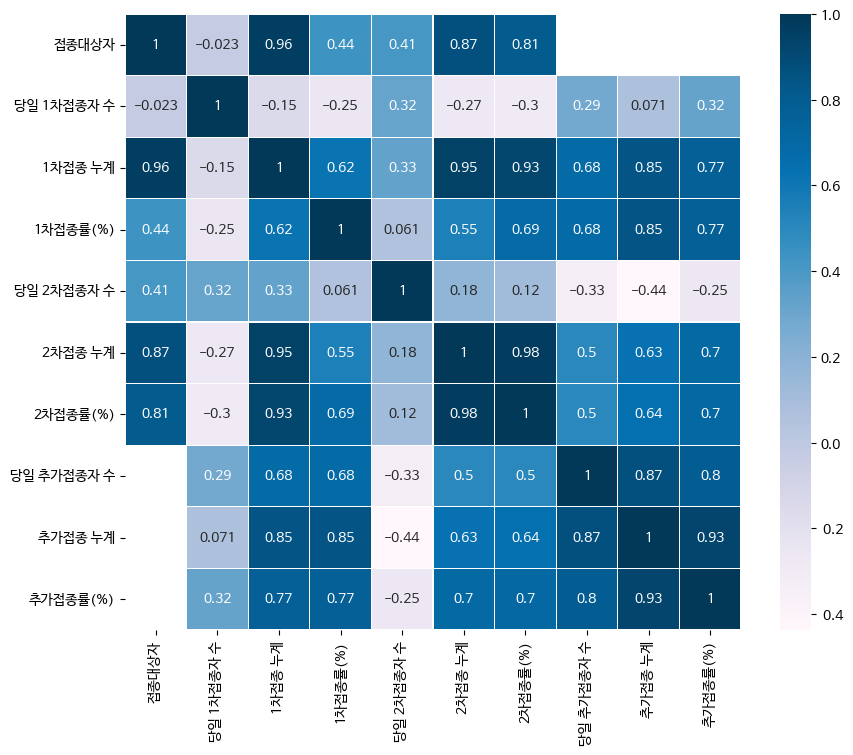

In [53]:
# 상관관계 분석을 위한 데이터셋 구성
df_corr1 = df_v[['접종대상자','당일 1차접종자 수','1차접종 누계','1차접종률(%)','당일 2차접종자 수','2차접종 누계','2차접종률(%)','당일 추가접종자 수','추가접종 누계','추가접종률(%)']]
colormap = plt.cm.PuBu 
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(10, 8)) 
sns.heatmap(df_corr1.astype(float).corr(), linewidths = 0.1, vmax = 1.0, 
            square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10})

- 1차 접종률의 경우 2개의 분포가 나타나는것을 알 수 있다.
- 2차 접종률이 높을 수록 당일 1차 접종자수가 낮은것을 알 수 있다

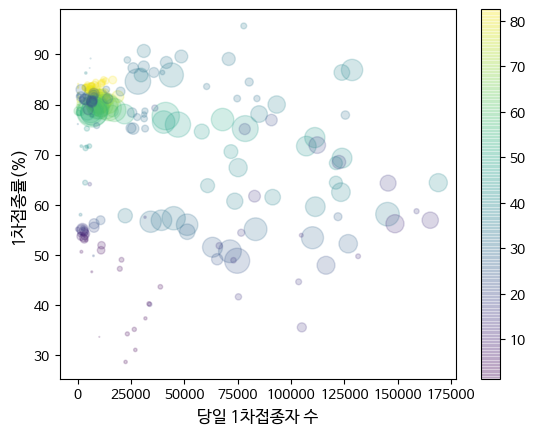

In [54]:
# 당일 1차접종자 수, 1차접종률(%), 당일 2차접종자 수, 2차접종률(%)를 이용한 산점도 그래프 작성
plt.scatter(df_v['당일 1차접종자 수'],
           df_v['1차접종률(%)'],
           alpha=0.2, 
           s=df_v['당일 2차접종자 수']/400,
           c=df_v['2차접종률(%)'],
           cmap='viridis')

plt.xlabel('당일 1차접종자 수', fontsize=12)
plt.ylabel('1차접종률(%)', fontsize=12)
plt.colorbar()
plt.show()

- 토요일의 경우 다른 요일에 비해 급격하게 낮은 접종자 수를 알 수 있다

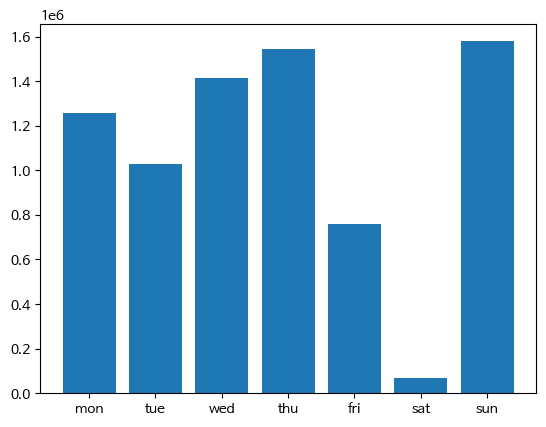

In [56]:
#요일을 기준으로 데이터 합산
df_v['접종일'] = pd.to_datetime(df_v['접종일'])
df_v['dayofweek'] = df_v['접종일'].dt.dayofweek
df_v_week_new_vaccinations = df_v.pivot_table(index = 'dayofweek', aggfunc = 'sum', values = '당일 1차접종자 수')
x = np.arange(7)
plt.bar(x, df_v_week_new_vaccinations['당일 1차접종자 수'])
plt.xticks(x, ['mon','tue', 'wed', 'thu','fri', 'sat', 'sun'])
plt.show()

- 토요일의 경우 다른 요일에 비해 급격하게 낮은 접종자 수를 알 수 있다

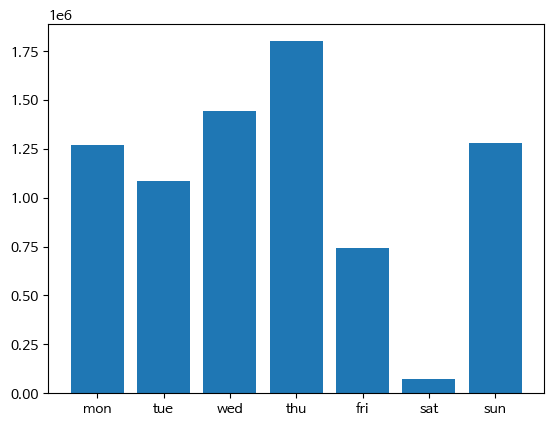

In [57]:
#요일을 기준으로 데이터 합산
df_v_week_new_vaccinations = df_v.pivot_table(index = 'dayofweek', aggfunc = 'sum', values = '당일 2차접종자 수')
x = np.arange(7)
plt.bar(x, df_v_week_new_vaccinations['당일 2차접종자 수'])
plt.xticks(x, ['mon','tue', 'wed', 'thu','fri', 'sat', 'sun'])
plt.show()

In [68]:
import pandas as pd
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [70]:
df =pd.read_csv('중소벤처기업진흥공단_코로나19 피해기업 지원현황_20210930.csv',encoding='cp949')

In [71]:
import seaborn as sns

In [72]:
df['업력2'] =df['업력'].map(lambda x : '10년이상' if int(x.split('년')[0]) >=10 else '10년이하')

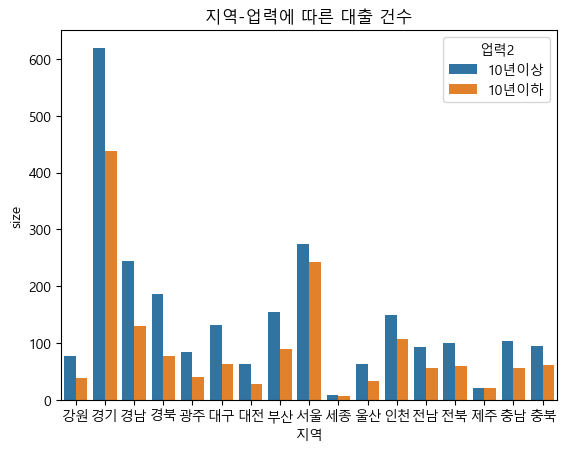

In [78]:
sns.barplot(data = df.groupby(['지역','업력2'],as_index=False).size(),x='지역',y='size',hue='업력2')
plt.title('지역-업력에 따른 대출 건수')
plt.show()

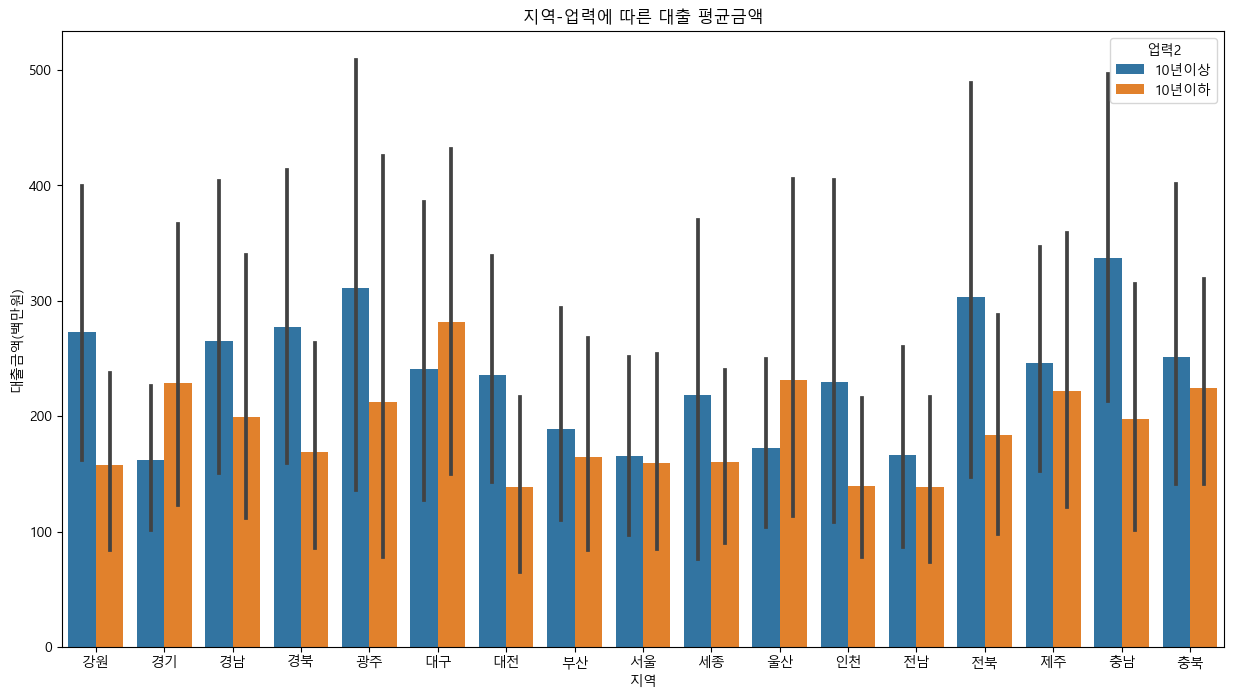

In [79]:
plt.figure(figsize=(15,8))
sns.barplot(data = df.groupby(['지역','업력2','대출금액(백만원)'],as_index=False).mean(),x='지역',y='대출금액(백만원)',hue='업력2')
plt.title('지역-업력에 따른 대출 평균금액')
plt.show()

In [ ]:
https://www.youtube.com/watch?v=BYY2oVQCdU0 유튜브링크